Group members

EZAMAMTI RONALD AUSTINE

WANGOBI NICHOLAS KAKULU

WANGOLO BACHAWA


In [1]:
import time
import random
import matplotlib.pyplot as plt

# Quick Sort
def quick_sort(arr):
    # Base case: if array has 1 or 0 elements, it is already sorted
    if len(arr) <= 1:
        return arr
    # Choose the middle element as pivot
    pivot = arr[len(arr) // 2]
    # Partition array into elements less than, equal to, and greater than pivot
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    # Recursively sort left and right, then combine with middle
    return quick_sort(left) + middle + quick_sort(right)

In [2]:
# Merge Sort
def merge_sort(arr):
    # Base case: if array has 1 or 0 elements, it is already sorted
    if len(arr) <= 1:
        return arr
    # Find the midpoint to split the array
    mid = len(arr) // 2
    # Recursively split and sort each half
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    # Merge the sorted halves and return
    return merge(left, right)

def merge(left, right):
    # Initialize merged result array
    result = []
    i = j = 0  # Pointers for left and right arrays
    # Merge elements from left and right arrays in sorted order
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    # Append any remaining elements in left or right
    result.extend(left[i:])
    result.extend(right[j:])
    return result

In [3]:
# Insertion Sort
def insertion_sort(arr):
    # Traverse from the second element to the end
    for i in range(1, len(arr)):
        key = arr[i]  # Element to be inserted in the sorted portion
        j = i - 1
        # Shift elements greater than key to the right
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        # Insert key in the correct position
        arr[j + 1] = key
    return arr


In [4]:
# Bubble Sort
def bubble_sort(arr):
    n = len(arr)  # Get the length of the array
    for i in range(n):  # Traverse through all array elements
        for j in range(0, n-i-1):  # Last i elements are already sorted
            if arr[j] > arr[j+1]:  # If the current element is greater than the next
                arr[j], arr[j+1] = arr[j+1], arr[j]  # Swap the elements
    return arr

In [5]:
# Heap Sort
def heap_sort(arr):
    n = len(arr)  # Get the length of the array
    # Build a maxheap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    # Extract elements from the heap one by one
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap
        heapify(arr, i, 0)  # Heapify the root element
    return arr


def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    left = 2 * i + 1  # Left child index
    right = 2 * i + 2  # Right child index
    if left < n and arr[left] > arr[largest]:
        largest = left  # Update largest if left child is greater
    if right < n and arr[right] > arr[largest]:
        largest = right  # Update largest if right child is greater
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Swap
        heapify(arr, n, largest)  # Recursively heapify the affected sub-tree

In [6]:
# Selection Sort
def selection_sort(arr):
    n = len(arr)  # Get the length of the array
    for i in range(n):  # Traverse through all array elements
        min_index = i  # Assume the minimum is the first element
        for j in range(i+1, n):  # Find the minimum element in the remaining unsorted array
            if arr[j] < arr[min_index]:
                min_index = j  # Update the index of the minimum element
        arr[i], arr[min_index] = arr[min_index], arr[i]  # Swap the found minimum with the first element
    return arr

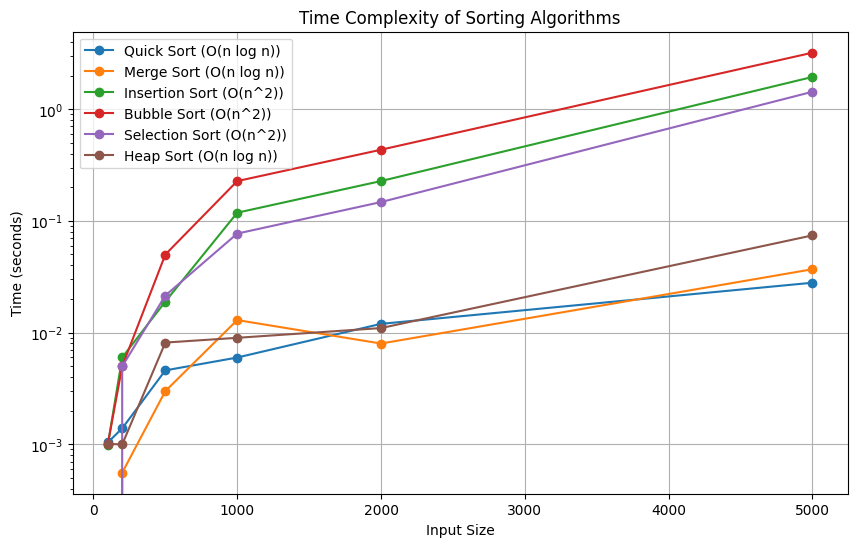

In [9]:
# Measure the time complexities for each algorithm with increasing input sizes
sizes = [100, 200, 500, 1000, 2000, 5000]  # Different input sizes to test
quick_sort_times = []  # To store execution time for Quick Sort
merge_sort_times = []  # To store execution time for Merge Sort
insertion_sort_times = []  # To store execution time for Insertion Sort
bubble_sort_times = []  # To store execution time for Bubble Sort
selection_sort_times = []  # To store execution time for Selection Sort
heap_sort_times = []  # To store execution time for Heap Sort

# Run sorting algorithms on arrays of increasing size and record their execution times
for size in sizes:
    arr = random.sample(range(10000), size)  # Generate a random array of given size

    # Measure Quick Sort time
    start_time = time.time()  # Record start time
    quick_sort(arr.copy())  # Sort a copy of the array
    quick_sort_times.append(time.time() - start_time)  # Record elapsed time

    # Measure Merge Sort time
    start_time = time.time()  # Record start time
    merge_sort(arr.copy())  # Sort a copy of the array
    merge_sort_times.append(time.time() - start_time)  # Record elapsed time

    # Measure Insertion Sort time
    start_time = time.time()  # Record start time
    insertion_sort(arr.copy())  # Sort a copy of the array
    insertion_sort_times.append(time.time() - start_time)  # Record elapsed time

    # Measure Bubble Sort time
    start_time = time.time()  # Record start time
    bubble_sort(arr.copy())  # Sort a copy of the array
    bubble_sort_times.append(time.time() - start_time)  # Record elapsed time

    # Measure Selection Sort time
    start_time = time.time()  # Record start time
    selection_sort(arr.copy())  # Sort a copy of the array
    selection_sort_times.append(time.time() - start_time)  # Record elapsed time

    # Measure Heap Sort time
    start_time = time.time()  # Record start time
    heap_sort(arr.copy())  # Sort a copy of the array
    heap_sort_times.append(time.time() - start_time)  # Record elapsed time

# Plotting the time complexities
plt.figure(figsize=(10, 6))  # Create a figure with a custom size
plt.plot(sizes, quick_sort_times, label='Quick Sort (O(n log n))', marker='o')  # Plot Quick Sort times
plt.plot(sizes, merge_sort_times, label='Merge Sort (O(n log n))', marker='o')  # Plot Merge Sort times
plt.plot(sizes, insertion_sort_times, label='Insertion Sort (O(n^2))', marker='o')  # Plot Insertion Sort times
plt.plot(sizes, bubble_sort_times, label='Bubble Sort (O(n^2))', marker='o')  # Plot Bubble Sort times
plt.plot(sizes, selection_sort_times, label='Selection Sort (O(n^2))', marker='o')  # Plot Selection Sort times
plt.plot(sizes, heap_sort_times, label='Heap Sort (O(n log n))', marker='o')  # Plot Heap Sort times

# Labeling the plot
plt.xlabel('Input Size')  # Label for the x-axis
plt.ylabel('Time (seconds)')  # Label for the y-axis
plt.title('Time Complexity of Sorting Algorithms')  # Plot title
plt.legend()  # Show legend
plt.grid(True)  # Enable grid for readability
plt.yscale('log')  # Use logarithmic scale for y-axis to better visualize differences
plt.show()  # Display the plot